# Introduction to Data Science
## Homework 2

Student Name:
Chuan Long
Student Netid: 
cl4076

### Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [1]:
import pandas as pd
import numpy as np
# Load the dataset as dataframe object
df = pd.read_csv('data/cell2cell_data.csv', header = None, sep = ',')
# Label the dataset
df.columns = ['revenue', 'outcalls', 'incalls', 'months', 'eqpdays', 'webcap', 'marryyes', 'travel', 'pcown', 'creditcd', 'retcalls', 'churndep']
# Split the dataset using pandas
train_df = df.sample(frac = 0.8, random_state = 1)
test_df = df.drop(train_df.index)
# Another way to implement the split of dataset, not stable and not elegant
# df_split = np.random.rand(len(df)) < 0.8
# train_df = df[df_split].copy(deep = True)
# test_df = df[~df_split].copy(deep = True)

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

The selection bias may lead to the bad result of fitting a prediction model. Here, we have to prove that the selection of a sample is random. So, we can scale the index of the samples that I have selected and scale them into the interval [-1, 1]. We generate them for a large number of times, and calculate the mean of scaled indexes. And then, we can generate a diagram that present the distribution of the means that we have calculated. And if the mean of this distribution of selected indexes is 0.0 and the variance is about 0.6667, we can prove that the distribution of selected indexes is accord with uniform distribution, so that we can prove that the data is indeed randomly sampled on our dataset. Because the test dataset is the dataset that excluding the train dataset. So, we can make sure that the test dataset would not overlap the train dataset, and what's more, we can apply the same method as the train dataset to the test dataset. If we got the the expected mean value and variance value, we can prove that both the dataset are randomly sampled on X. 

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [11]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
# Create the instance of DecisionTreeClassifier and fit the model
clf = DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(train_df.drop('churndep', 1), train_df.churndep)

4\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

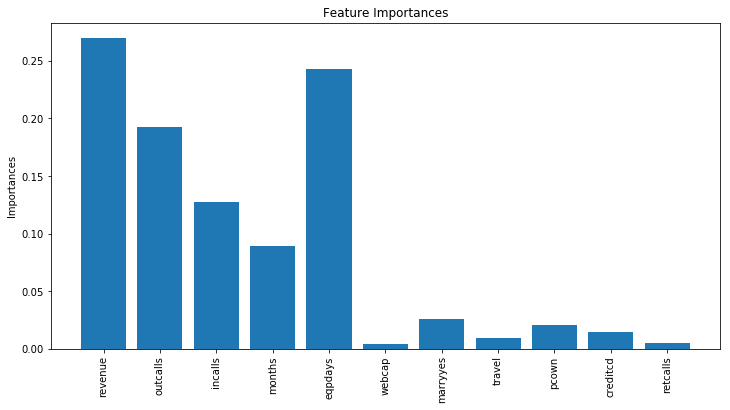

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
# Plot the bar figure for the feature importances
label_names = train_df.drop('churndep', 1).columns.values
plt.bar(np.arange(11), clf.feature_importances_)
plt.xticks(np.arange(11), label_names, rotation = 90)
plt.ylabel('Importances')
plt.title('Feature Importances')
plt.show()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

Code/answer here
real world interpretation
see one variable, observe the other variable.

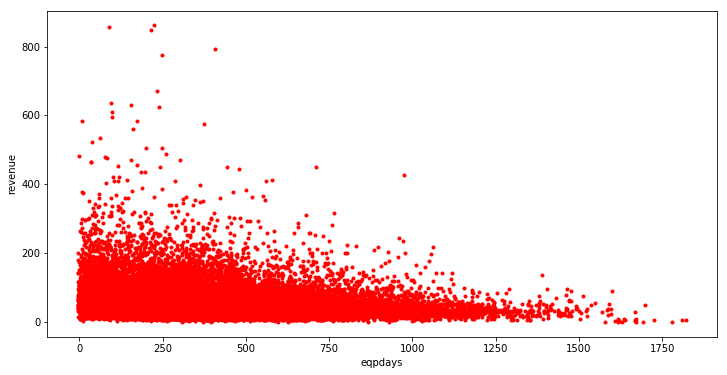

In [97]:
plt.figure(figsize = (12, 6))
plt.plot(train_df.eqpdays, train_df.revenue, 'r.')
plt.xlabel('eqpdays')
plt.ylabel('revenue')

The above figure shows the relation between eqpdays and revenue. As we can see, the points seems like when the value of eqpdays inceases, the value of revenue decreases. So, the relation between them may be negative in this case. So, it may imply that when the days that a customer holds his current equipment longer, the monthly mean revenue maybe decrease. For example, let me assume that this is the historical statistic data from a telecom like AT&T. The equipment could be a cell phone, which is a part of family plan or something. When a customer holds the equipment longer, the mean revenue for the company may decrease because for a long term, the family plan would be more benefit for customer.

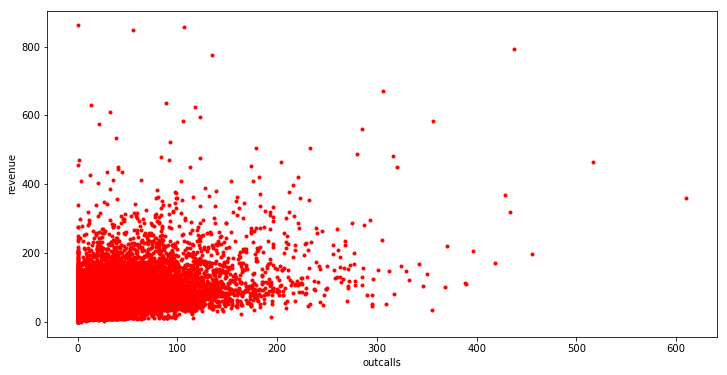

In [98]:
plt.figure(figsize = (12, 6))
plt.plot(train_df.outcalls, train_df.revenue, 'r.')
plt.xlabel('outcalls')
plt.ylabel('revenue')

The above figure shows the relation between revenue and outcalls. As we can see, when the value of outcalls increases, so do the value of the revenue. So, the relation between revenue and outcalls may be positive in this case. Assume the same scenario from a telecom, we can infer the relation in a intuitive way. For example, if a customer make more outbound phonecalls, the company can get more revenue from this customer because the company charge the customer based on the number of phonecalls(or the overall time that the outbound phonecalls make)

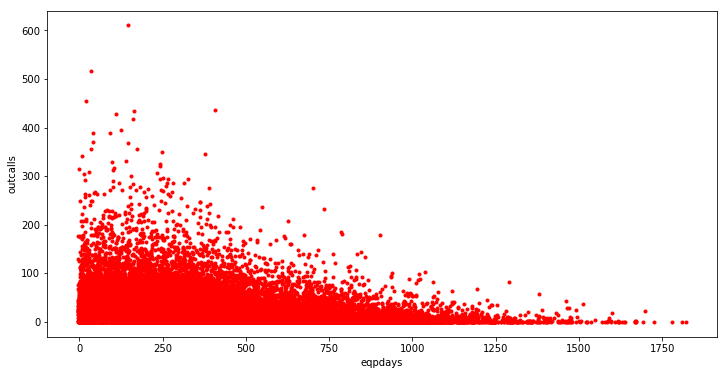

In [94]:
plt.figure(figsize = (12, 6))
plt.plot(train_df.eqpdays, train_df.outcalls, 'r.')
plt.xlabel('eqpdays')
plt.ylabel('outcalls')

The above figure shows the relation between eqpdays and outcalls. As we can see, when the value of eqpdays increases, the value of outcalls decreases to some extend. So, the relation between revenue and outclass may be positive in this case. Assume this is still the same scenario from a telecom. If a customer holds his equipment longer, he would make less outcalls because the equipment may be some kind of wear down because every equipment has its own working life. And when days goes longer, the equipment might be some kind of wear down, so that a customer may not want to use it or use it less.

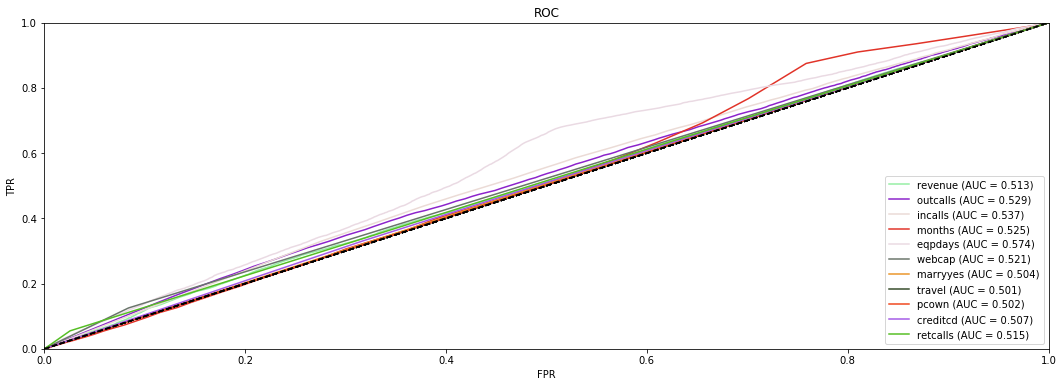

In [69]:
from sklearn.metrics import roc_curve, auc

def plotUnivariateROC(preds, truth, label_string):
    '''
    preds is an nx1 array of predictions
    truth is an nx1 array of truth labels
    label_string is text to go into the plotting label
    '''
    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = auc(fpr, tpr)

    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds)
        roc_auc = auc(fpr, tpr)

    #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())

    #create a plot and set some options
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

plt.figure(figsize=(18,6))
feature_auc_dict = {}
for col in df.drop('churndep',1).columns:
    feature_auc_dict[col] = plotUnivariateROC(df[col], df.churndep, col)

The ROC diagram does not show an expected result. The value of AUC of each attribute is very close to 0.5 which means the performance of each attribute that used to predict the binary class is not good. But we can reason that the value of these attributes are continues numeric value, so we can conclude that these continuous value might not good for predicting the binary class.

6\. Using the classifier built in 2.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

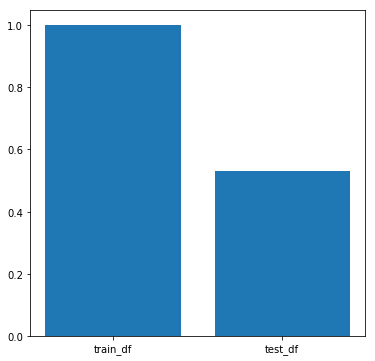

In [96]:
# Code here
train_accurancy = clf.score(train_df.drop('churndep', 1), train_df.churndep)
test_accurancy = clf.score(test_df.drop('churndep', 1), test_df.churndep)
accuracy = ['train_df', 'test_df']
plt.figure(figsize = (6, 6))
plt.bar(range(2), [train_accurancy, test_accurancy])
plt.xticks(range(2), accuracy)
plt.show()

### Part 2 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [16]:
# Code here
# min_samples_split_values = None
# min_samples_leaf_values = None

# Big ranges for exploring the dataset
min_samples_split_values = [pow(2, i) for i in range(1, 11)]
min_samples_leaf_values = [int(pow(2, i) / 2) for i in range(1, 11)]

# Small ranges for debugging
# min_samples_split_values = [2, 4]
# min_samples_leaf_values = [1, 2]
# min_samples_split_values, min_samples_leaf_values

([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024],
 [1, 2, 4, 8, 16, 32, 64, 128, 256, 512])

2\. Explain in words your reasoning for choosing the above ranges.

Note that min_samples_split means the minimum number of samples required to split an internal node. And min_samples_leaf means the minimum number of samples required to be at a leaf node. Assume that if a node is splited  evenly, so, the minimum number of samples required to be at a leaf node should be approximately a half of the minimum number of samples required to split an internal node. So, I choose a relatively large and even parameter range to explore this dataset, to roughly locate the a small and better parameter range. And then, I can choose a relatively small range of configuration to fit the model through analyzing the plot figure. The reason why I don't choose a larger and more even range is that I think the number of samples are too big, the trend may not show much change. (I also experimented several parameter ranges, but this one is definitely my first choose.)

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

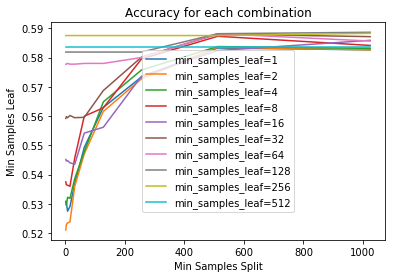

best_score = 0.5886853988961365
best_min_samples_leaf = 128
best_min_samples_split = 1024


In [68]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
# Define the function to get the Score
def getScore(train_df, test_df, split_value, leaf_value):
    clf = DecisionTreeClassifier(criterion = 'entropy',\
                                 min_samples_split = split_value,\
                                 min_samples_leaf = leaf_value)
    clf = clf.fit(train_df.drop('churndep', 1), train_df.churndep)
    return clf.score(test_df.drop('churndep', 1), test_df.churndep)

def plotAccuracy(train_df, test_df, min_samples_leaf_values, min_samples_split_values):
    # Train the classfier and get the mean score for each combination
    res = dict()
    best_score = 0
    best_combination = [1, 2]
    for leaf in min_samples_leaf_values:
        res[leaf] = list()
        for split in min_samples_split_values:
            score = getScore(train_df, test_df, split, leaf)
            res[leaf].append(score)
            if score > best_score:
                best_score = score
                best_combination = [leaf, split]
    
    # Plot the accuracy for each combination
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for leaf in min_samples_leaf_values:
        plt.plot(min_samples_split_values, res[leaf], label = 'min_samples_leaf={}'.format(leaf))
    plt.legend(loc = 10)
    ax.set_xlabel('Min Samples Split')
    ax.set_ylabel('Min Samples Leaf')
    plt.title('Accuracy for each combination')
    plt.show()
    return best_score, best_combination

best_score, best_combination = plotAccuracy(train_df, test_df, min_samples_leaf_values, min_samples_split_values)
print('best_score = {}'.format(best_score))
print('best_min_samples_leaf = {}'.format(best_combination[0]))
print('best_min_samples_split = {}'.format(best_combination[1]))

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

Solution: The configuration of the min_samples_leaf is 128 and the min_samples_split is 1024 has the best accuracy, which is approximately 0.59. As we can see, for the same min_samples_leaf values, the accuracy will be improved as the value of min_samples_split goes high. Now that, let's keep a high value of min_samples_split and explore the dataset, trying to get a better fitting result. (The following one is the result when I choose a relatively higher ranges, and I find a better configuration that has higher score. And the rest ones are some experiments that I tried to make to prove Q2.)

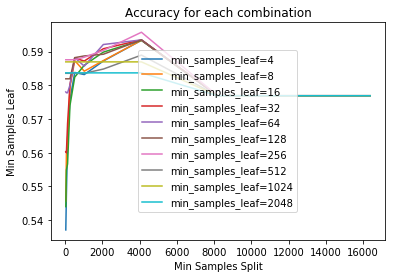

best_score = 0.5957099849473156
best_min_samples_leaf = 256
best_min_samples_split = 4096


In [20]:
split_values = [pow(2, i) for i in range(5, 15)]
leaf_values = [pow(2, i) for i in range(2, 12)]
best_test_score, best_test_combination = plotAccuracy(train_df, test_df, leaf_values, split_values)
print('best_score = {}'.format(best_test_score))
print('best_min_samples_leaf = {}'.format(best_test_combination[0]))
print('best_min_samples_split = {}'.format(best_test_combination[1]))

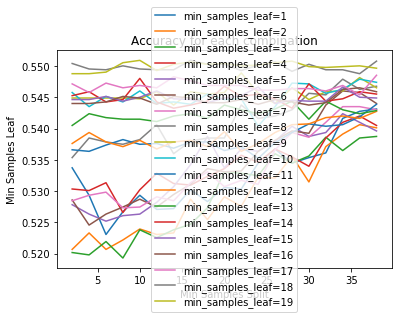

best_score = 0.5509282488710486
best_min_samples_leaf = 18
best_min_samples_split = 16


In [18]:
split_values = [2 * i for i in range(1, 20)]
leaf_values = [i for i in range(1, 20)]
best_test_score, best_test_combination = plotAccuracy(train_df, test_df, leaf_values, split_values)
print('best_score = {}'.format(best_test_score))
print('best_min_samples_leaf = {}'.format(best_test_combination[0]))
print('best_min_samples_split = {}'.format(best_test_combination[1]))

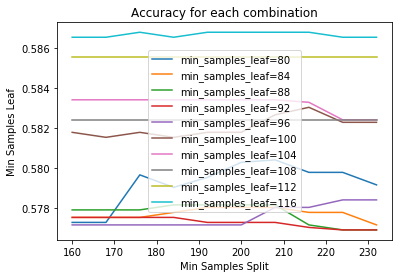

best_score = 0.5868038133467135
best_min_samples_leaf = 116
best_min_samples_split = 176


In [19]:
split_values = [8 * i for i in range(20, 30)]
leaf_values = [4 * i for i in range(20, 30)]
best_test_score, best_test_combination = plotAccuracy(train_df, test_df, leaf_values, split_values)
print('best_score = {}'.format(best_test_score))
print('best_min_samples_leaf = {}'.format(best_test_combination[0]))
print('best_min_samples_split = {}'.format(best_test_combination[1]))

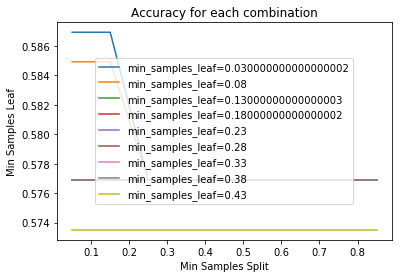

best_score = 0.5869292523833417
best_min_samples_leaf = 0.030000000000000002
best_min_samples_split = 0.05


In [24]:
split_values = [0.1 * i - 0.05 for i in range(1, 10)]
leaf_values = [0.05 * i - 0.02 for i in range(1, 10)]
best_test_score, best_test_combination = plotAccuracy(train_df, test_df, leaf_values, split_values)
print('best_score = {}'.format(best_test_score))
print('best_min_samples_leaf = {}'.format(best_test_combination[0]))
print('best_min_samples_split = {}'.format(best_test_combination[1]))

Using float number to make the range more evenly along the number of all the samples. But the plot figure didn't show much change for many configuration.

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

Through the model, we can predict whether a customer churn or not through the values of relative attributes. So, beyond this, we can analyze what attributes matter more than any other attributes that would demonstrate whether a customer churn or not. The reason why it would good for business is that we can know the importance of each feature related to this particular problem and be able to predict a customer churn or not. Based on the result of analysis, we can make some efforts to change the values of some specific attributes of a customer, so that we can change the rate of churn. For example, if we want to improve churn, we can note that the most important feature that determine a customer churn or not is revenue. So, we can increase or decrease(we have to figure out the relation of revenue and the churn is positive or negative) the value of revenue, to improve the probability of a customer churn, etc.